In [10]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit.circuit.library import QFT
from qiskit.visualization import plot_histogram
from numpy import pi

KeyboardInterrupt: 

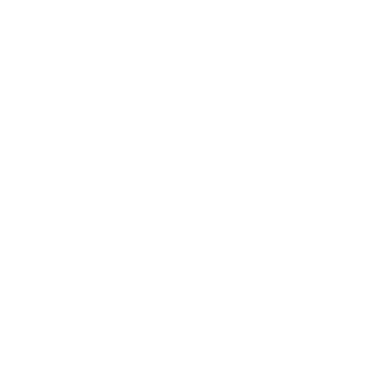

In [20]:
theta = 0.7
m = 15  # Number of control qubits

control = QuantumRegister(m, name="X")
target = QuantumRegister(1, name="Y")
output = ClassicalRegister(m, name="Z")
qc = QuantumCircuit(control, target, output)

# Prepare the eigenvector
qc.x(target)
qc.barrier()

# Perform phase estimation
for index, qubit in enumerate(control):
    qc.h(qubit)
    for _ in range(2**index):
        qc.cp(2 * pi * theta, qubit, target)
qc.barrier()

# Perform the inverse quantum Fourier transform
qc.compose(
    QFT(m, inverse=True).decompose(),
    inplace=True
)
qc.barrier()

# Measure everything
qc.measure(range(m), range(m))

display(qc.draw(output="mpl"))

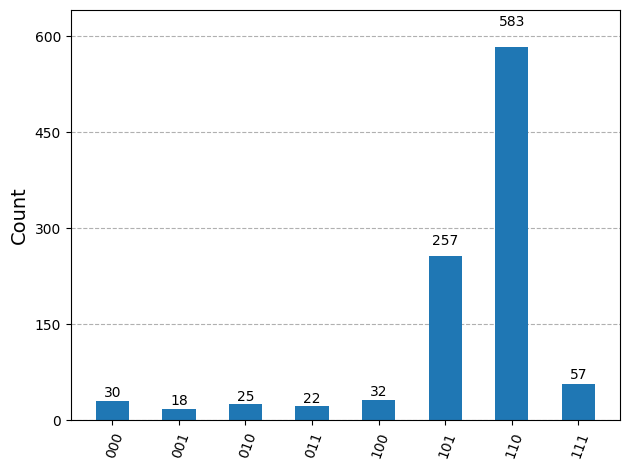

In [18]:
result = AerSimulator().run(qc).result()
statistics = result.get_counts()
display(plot_histogram(statistics))

In [ ]:
most_probable = int(max(statistics, key=statistics.get),2)
# most_probable = our integer y

print(f"Most probable output: {most_probable}")
print(f"Estimated theta: {most_probable/2**m}")

Most probable output: 6
Estimated theta: 0.75
